## TRF simulation - one continuous measure

Create a simulated dataset of a speech tracking response, varying the amount of data and the SNR.
Estimate the TRF using both ridge regression and boosting.

In [1]:
# Import relevant python packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import mne
import mtrf
import pickle

In [ ]:
# Load example data
exmp_speech_fn = 'speech_data.pkl'
with open(exmp_speech_fn,'rb') as file:
    speech_data = pickle.load(file)

print(speech_data)
exmp_eeg = speech_data['resp'][:,0] # retain just channel Cz from the example data
exmp_fs = speech_data['fs']
stim = speech_data['stim']
del speech_data

Text(0, 0.5, 'Signal amplitude')

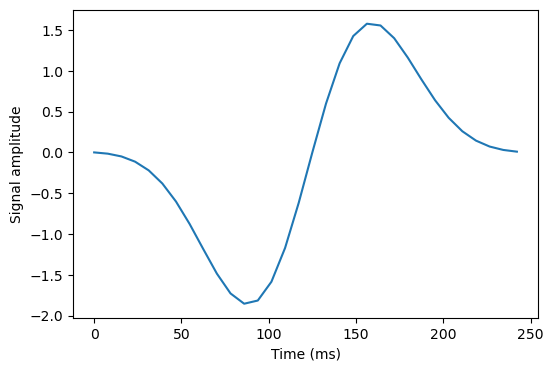

In [27]:
### Generate a target signal
# This approximately creates an N1-P2-like TRF, with a negativity around 100 ms and a positivity around 150 ms
sfreq = 128
trf_freq = 4 # modulation frequency of the TRF (will aim for a signal with an N100 and P200, approximately)
nchan = 1 # number of EEG channels
trf_dur = 250 # duration of the TRF, in ms
wnd_std = trf_dur/1000*sfreq/8 # standard deviation of the gaussian window, in indexes
    # the /6 at the end ensures the standard deviation is 1/8 of the full trf duration

t = np.arange(0,trf_dur/1000,1/sfreq) # time array
wnd = sp.signal.windows.gaussian(len(t),trf_dur/1000*sfreq/6) # gaussian window for the signal
sig = -np.sin(2*np.pi*t*trf_freq) * wnd
sig = (sig)/np.std(sig) # normalize sig

# Plot the signal
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(t*1000,sig)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Signal amplitude')


In [ ]:
### Load stimulus data and convolve with the TRF
# Allow the user to upload stimulus data
ntrials = np.arange(5,30,5) # number of trials
trial_dur = 60 # trial duration (s)
### The natural speech dataset only has 20 trials, each 3 minutes long (total ~60 minutes)
### Maybe concatenate the simulated responses and chunk 

x = np.convolve(stim,sig)

{'fs': array([[128]], dtype=uint8), 'stim': array([[1.47952889e-03, 2.11595806e-03, 3.03511909e-03, ...,
        2.18617790e-03, 1.70654902e-03, 1.36554706e-03],
       [1.37759007e-04, 1.97723928e-04, 2.93234027e-04, ...,
        3.16408728e-04, 1.98283052e-04, 1.54486198e-04],
       [8.04718273e-05, 2.34201840e-05, 1.79710837e-06, ...,
        9.46126804e-06, 3.44634864e-05, 8.81296511e-05],
       ...,
       [3.55430324e-03, 4.55255306e-03, 4.84833481e-03, ...,
        4.51706673e-03, 3.66105260e-03, 2.49226676e-03],
       [5.84868410e-03, 8.19612242e-03, 9.99325640e-03, ...,
        8.02683409e-03, 6.15383033e-03, 4.36350137e-03],
       [5.77194658e-03, 8.45784233e-03, 1.12144904e-02, ...,
        8.20670766e-03, 6.23772843e-03, 4.68684081e-03]]), 'resp': array([[-10.70624833,  -9.21401422,  -5.88960921, ...,   4.61009612,
          1.6667252 , -14.40570587],
       [-11.60357549,  -9.63399001,  -6.16102105, ...,   4.83955125,
          2.2958885 , -14.95242965],
       [-13.33

Text(0.5, 1.0, 'Example EEG data (applied for noise)')

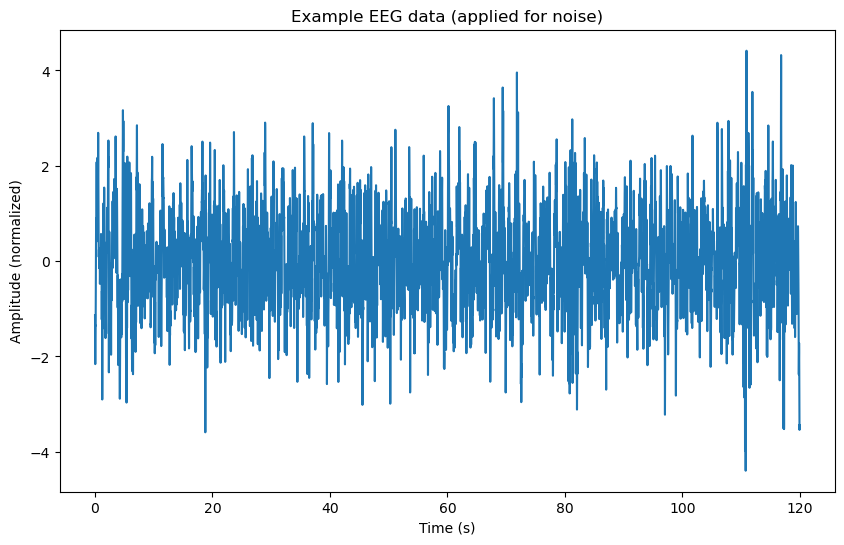

In [ ]:
### Create EEG-shaped noise

# zero-center and normalize the example EEG data
exmp_eeg = (exmp_eeg-np.mean(exmp_eeg))/np.std(exmp_eeg)

fig, ax = plt.subplots(figsize=(10,6))
exmp_time = np.reshape(np.arange(0,exmp_eeg.shape[0])/exmp_fs,(exmp_eeg.shape[0],1))
ax.plot(exmp_time,exmp_eeg)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (normalized)')
ax.set_title('Example EEG data (applied for noise)')

In [ ]:
### Add EEG-shaped noise to the signal
# Fourier Transform
fft_exmp_eeg = np.fft.fft(exmp_eeg)

# Randomize phases
random_phases = np.exp(1j * np.random.uniform(0, 2 * np.pi, len(fft_exmp_eeg)))
randomized_fft_signal = np.abs(fft_exmp_eeg) * random_phases

# Inverse Fourier Transform
rnd_exmp_eeg = np.fft.ifft(randomized_fft_signal)

# Phase-randomize the EEG before applying
SNR = np.arange(-40,-5,5) # range of signal-to-noise ratios

sig = x * SNR / rnd_exmp_eeg

In [ ]:
### Estimate the TRF using leave-one-out cross-validation
nrep = 10 # number of times to repeat each simulation
### should probably regenerate the noise each time this is run

In [ ]:
### Create a null distribution of prediction accuracies

In [ ]:
### Plot prediction accuracy (both r and MSE) as a function of the amount of data and SNR

In [ ]:
### Plot estimated TRF vs actual TRF as a function of the amount of data and SNR